In [27]:
def RK4(f, n, y0=0.5, t0=0, t_end=2):
    t_values, y_values = [t0], [y0]
    h = (t_end - t0) / n

    print("At t =", t0, "value of y is =", y0)

    for i in range(n):
        ti, yi = t_values[-1], y_values[-1]
        k1 = h * f(yi, ti)
        k2 = h * f(yi + k1 / 2, ti + h / 2)
        k3 = h * f(yi + k2 / 2, ti + h / 2)
        k4 = h * f(yi + k3, ti + h)
        y_i_plus_1 = yi + (k1 + 2 * (k2 + k3) + k4) / 6
        ti=ti+h
        print("for t=",ti ,"value of y is =", y_i_plus_1 ,'\n')


        t_values.append(ti)
        y_values.append(y_i_plus_1)




    return t_values, y_values


In [28]:
def f(y,t):
  return 1-t**2+y

In [29]:
t_values, y_values = RK4(f, 10)


At t = 0 value of y is = 0.5
for t= 0.2 value of y is = 0.8292933333333334 

for t= 0.4 value of y is = 1.2140762106666667 

for t= 0.6000000000000001 value of y is = 1.6489220170416001 

for t= 0.8 value of y is = 2.1272026849479437 

for t= 1.0 value of y is = 2.6408226927287517 

for t= 1.2 value of y is = 3.1798941702322305 

for t= 1.4 value of y is = 3.7323400728549796 

for t= 1.5999999999999999 value of y is = 4.283409498318406 

for t= 1.7999999999999998 value of y is = 4.815085694579435 

for t= 1.9999999999999998 value of y is = 5.305363000692655 



In [30]:
import numpy as np

n = 10  # Number of grid points
y0 = np.cos(np.linspace(0, 2*np.pi, n))
t0 = 0 #initial time
t_end = 2 # final time
nu = 0.1  # Viscosity coefficient

# Define the function f(y, t)
def f(y, t, nu=0.1):
    n = len(y)
    dydt = np.zeros_like(y)

    # Compute dy/dt for each point using finite differences
    for i in range(n):
        if i == 0:
            dydt[i] = -y[i] * (y[i+1] - y[n-1]) / 2 + nu * (y[n-1] - 2 * y[i] + y[i+1]) / (n-1)**2
        elif i == n-1:
            dydt[i] = -y[i] * (y[0] - y[i-1]) / 2 + nu * (y[i-1] - 2 * y[i] + y[0]) / (n-1)**2
        else:
            dydt[i] = -y[i] * (y[i+1] - y[i-1]) / 2 + nu * (y[i-1] - 2 * y[i] + y[i+1]) / (n-1)**2

    return dydt


# Run RK4 method
t_values, y_values = RK4(f, n, y0, t0, t_end)

At t = 0 value of y is = [ 1.          0.76604444  0.17364818 -0.5        -0.93969262 -0.93969262
 -0.5         0.17364818  0.76604444  1.        ]
for t= 0.2 value of y is = [ 1.01896957  0.83179839  0.19828195 -0.56055162 -0.9767954  -0.89507841
 -0.44871143  0.15385997  0.70540544  0.97282155] 

for t= 0.4 value of y is = [ 1.02813156  0.9019579   0.2294544  -0.63219901 -1.00393829 -0.84584025
 -0.40532041  0.13777068  0.65039073  0.9395927 ] 

for t= 0.6000000000000001 value of y is = [ 1.0263321   0.97492956  0.26952071 -0.71701407 -1.01865531 -0.79445568
 -0.36852488  0.12450979  0.60092067  0.90243711] 

for t= 0.8 value of y is = [ 1.01317279  1.04818259  0.32185739 -0.81752954 -1.01882251 -0.74311209
 -0.33721425  0.11344028  0.55667433  0.86335101] 

for t= 1.0 value of y is = [ 0.98913423  1.11804652  0.39137643 -0.93700851 -1.00281008 -0.69363051
 -0.31044632  0.10409067  0.51719651  0.82405106] 

for t= 1.2 value of y is = [ 0.95560192  1.17952005  0.485344   -1.07997456 -

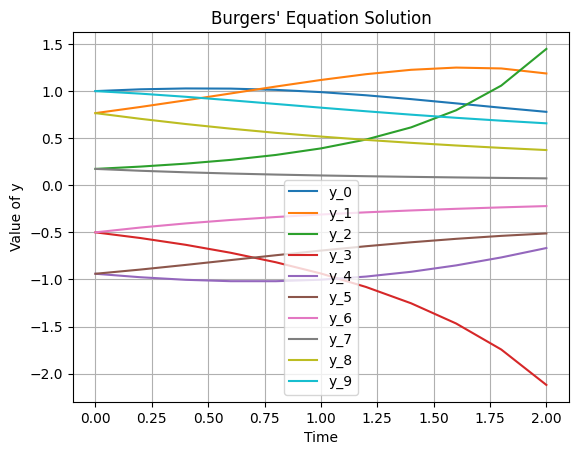

In [31]:
import matplotlib.pyplot as plt
for i in range(len(y_values[0])):
    plt.plot(t_values, [y[i] for y in y_values], label=f'y_{i}')
plt.xlabel('Time')
plt.ylabel('Value of y')
plt.title('Burgers\' Equation Solution')
plt.legend()
plt.grid(True)
plt.show()